<a href="https://colab.research.google.com/github/Jitmandal051004/EEG_Analysis_SOP/blob/main/Grasp_and_Lift_EEG_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/competitions/grasp-and-lift-eeg-detection/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jitmandal24
Your Kaggle Key: ··········
Extracting archive ./grasp-and-lift-eeg-detection/grasp-and-lift-eeg-detection.zip to ./grasp-and-lift-eeg-detection


In [2]:
import zipfile
import os

def extract_zip(zip_file, extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print(f"Files extracted to: {extract_folder}")
    os.remove(zip_file)
    print(f"Deleted {zip_file}")

file_paths = ['/content/grasp-and-lift-eeg-detection/train.zip', '/content/grasp-and-lift-eeg-detection/test.zip', "/content/grasp-and-lift-eeg-detection/sample_submission.csv.zip"]
extract_folder = '/content/grasp-and-lift-eeg-detection'

for zip_file in file_paths:
    extract_zip(zip_file, extract_folder)


Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/train.zip
Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/test.zip
Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/sample_submission.csv.zip


In [3]:
!pip install mne --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import mne

                          id  Fp1  Fp2   F7   F3   Fz   F4   F8  FC5  FC1  \
0            subj1_series1_0  -31  363  211  121  211   15  717  279   35   
1            subj1_series1_1  -29  342  216  123  222  200  595  329   43   
2            subj1_series1_2 -172  278  105   93  222  511  471  280   12   
3            subj1_series1_3 -272  263  -52   99  208  511  428  261   27   
4            subj1_series1_4 -265  213  -67   99  155  380  476  353   32   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
119491  subj1_series1_119491  478  520  377  172  141  118 -123  626   70   
119492  subj1_series1_119492  439  450  298  185  128  502 -331  593   30   
119493  subj1_series1_119493  363  370  278  239  124  768 -410  527   16   
119494  subj1_series1_119494  281  298  318  257  130  736 -556  542   29   
119495  subj1_series1_119495  242  266  234  176  135  617 -622  418   31   

        ...   P7   P3   Pz   P4   P8  PO9   O1   Oz   O2  PO10  
0       ..

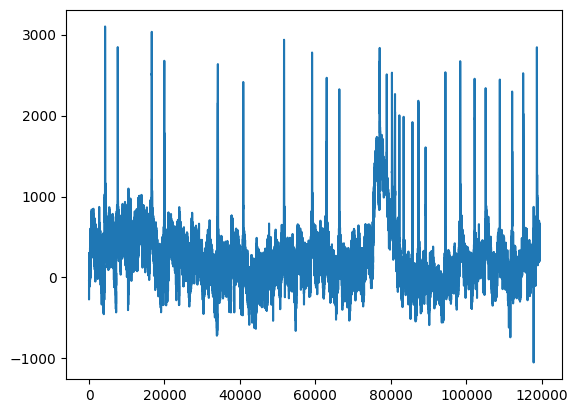

In [5]:
df = pd.read_csv("/content/grasp-and-lift-eeg-detection/train/subj1_series1_data.csv")
print(df)
ch_names = list(df.columns[1:])
print(ch_names)
print(df.columns[1:])

print(df["FC1"].shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(df["Fp1"])
plt.show()

In [6]:
scaling_factor = 1e-6
sampling_rate = 500

eeg_data = df.iloc[:, 1:].to_numpy(dtype = float)
eeg_data = eeg_data.T * scaling_factor
n_channels, n_samples = eeg_data.shape
ch_names = list(df.iloc[:, 1:].columns)
ch_types = ['eeg'] * n_channels
print("Number of samples:", n_samples)
print("Number of channels:", n_channels)
print("Channel names:", ch_names)
print("Channel types:", ch_types)
print(eeg_data)
print(eeg_data.shape)

Number of samples: 119496
Number of channels: 32
Channel names: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']
Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
[[-3.10e-05 -2.90e-05 -1.72e-04 ...  3.63e-04  2.81e-04  2.42e-04]
 [ 3.63e-04  3.42e-04  2.78e-04 ...  3.70e-04  2.98e-04  2.66e-04]
 [ 2.11e-04  2.16e-04  1.05e-04 ...  2.78e-04  3.18e-04  2.34e-04]
 ...
 [ 1.73e-04  1.41e-04  1.41e-04 ... -9.90e-05 -1.22e-04 -6.50e-05]
 [ 1.20e-04  8.30e-05  6.20e-05 ... -2.69e-04 -2.90e-04 -2.29e-04]
 [ 7.04e-04  7.37e-04  6.77e-04 ... -1.21e-04 -7.70e-05 -1.53e-04]]
(32, 119496)


Creating RawArray with float64 data, n_channels=32, n_times=119496
    Range : 0 ... 119495 =      0.000 ...   238.990 secs
Ready.
Using matplotlib as 2D backend.


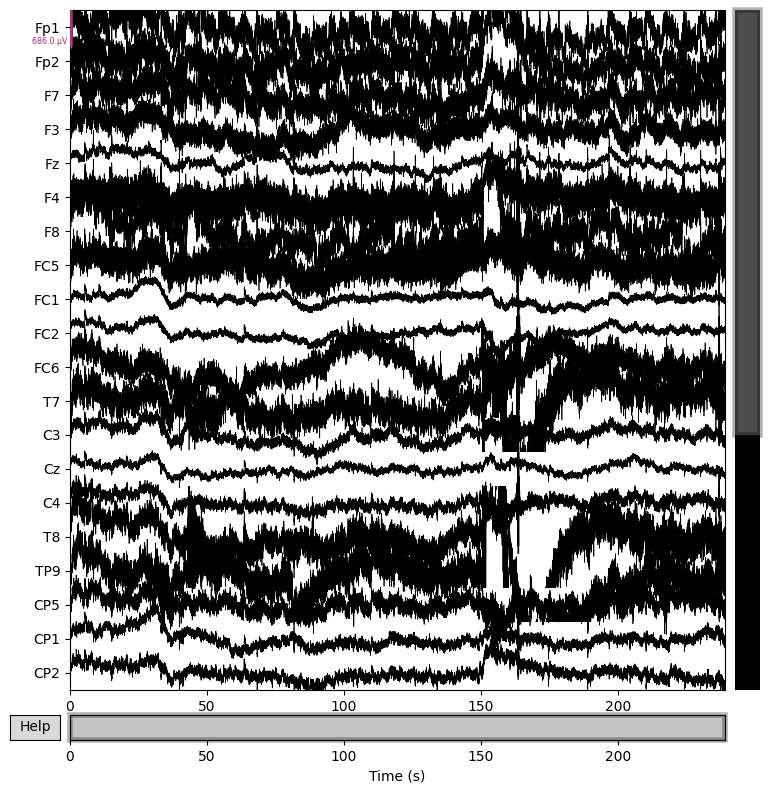

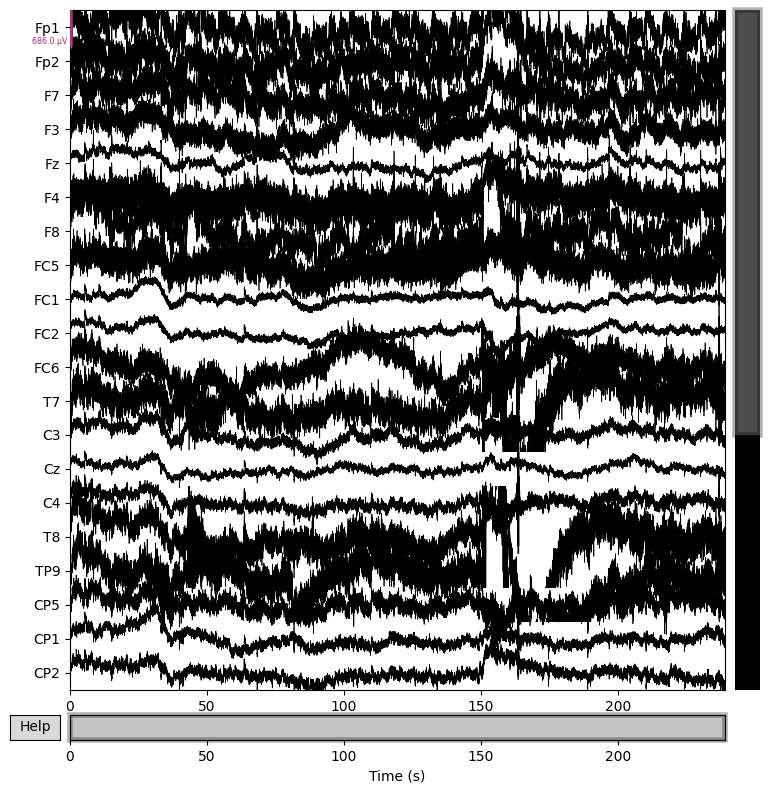

In [7]:
info = mne.create_info(ch_names=ch_names, sfreq=sampling_rate, ch_types=ch_types)
raw = mne.io.RawArray(eeg_data, info)
raw
raw.plot(duration=250, scalings='auto')

### events

                          id  HandStart  FirstDigitTouch  BothStartLoadPhase  \
0            subj1_series1_0          0                0                   0   
1            subj1_series1_1          0                0                   0   
2            subj1_series1_2          0                0                   0   
3            subj1_series1_3          0                0                   0   
4            subj1_series1_4          0                0                   0   
...                      ...        ...              ...                 ...   
119491  subj1_series1_119491          0                0                   0   
119492  subj1_series1_119492          0                0                   0   
119493  subj1_series1_119493          0                0                   0   
119494  subj1_series1_119494          0                0                   0   
119495  subj1_series1_119495          0                0                   0   

        LiftOff  Replace  BothReleased 

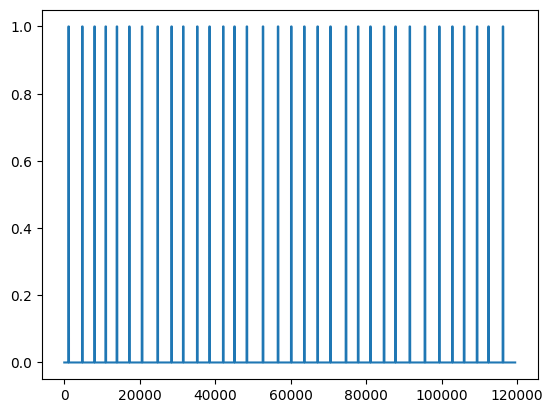

In [8]:
event = pd.read_csv("/content/grasp-and-lift-eeg-detection/train/subj1_series1_events.csv")
eeg_Events = event.iloc[:, 1:].to_numpy()
print(event)
print(f'unique:{event["HandStart"].unique()}')
print(f"eeg_Events:{eeg_Events}")
fig, ax = plt.subplots(1, 1)
ax.plot(event["HandStart"])
plt.show()

### Bad Signal

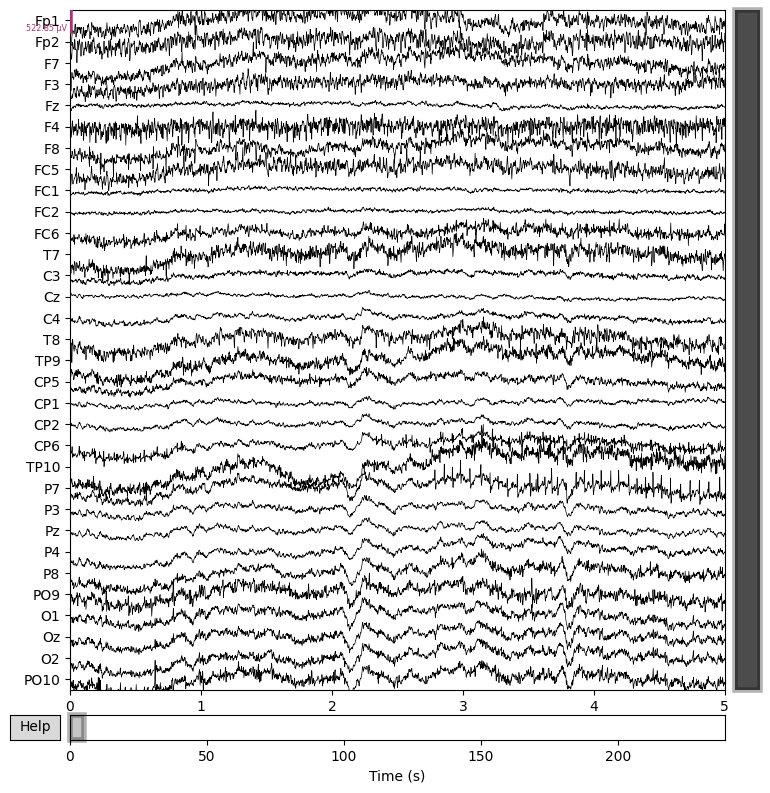

In [9]:
# Plot 10 seconds of data from all channels
raw.plot(duration=5, n_channels=len(raw.ch_names), scalings='auto', show=False)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
plt.show()

In [10]:
stds = raw.get_data().std(axis=1)
for ch, s in zip(raw.ch_names, stds):
    print(f"{ch}: {s}")

Fp1: 0.00037390980172849914
Fp2: 0.0003136849609608436
F7: 0.00020764470289633482
F3: 0.00020406420074086618
Fz: 0.00014113033040508597
F4: 0.00022145625931072792
F8: 0.00047915879787216345
FC5: 0.0001988732316793889
FC1: 0.00011365441876085372
FC2: 0.00012460382397099813
FC6: 0.0003179581246804862
T7: 0.000654320876993716
C3: 0.00016077645912805785
Cz: 0.00010453046070453988
C4: 0.0001411439032915839
T8: 0.001281819685834573
TP9: 0.0011668984078238634
CP5: 0.00015802222229139892
CP1: 0.00015956346409780653
CP2: 0.00015538323163784057
CP6: 0.0002335163782252549
TP10: 0.0005874770805455707
P7: 0.00022209550298683969
P3: 0.00015124030530688025
Pz: 0.0001897866670517083
P4: 0.00026706229031158514
P8: 0.00024823124291769986
PO9: 0.000212855181089082
O1: 0.00020257973860543524
Oz: 0.00018811603595682598
O2: 0.00025645699901711324
PO10: 0.00022539250764086656


In [11]:
raw.info['bads'] = ['T8', 'TP9']
print(raw.info['bads'])

['T8', 'TP9']


In [12]:
print(raw.info)
raw.load_data()
raw.plot(duration=5, n_channels=len(raw.ch_names), scalings='auto', show=False)
plt.show()

<Info | 9 non-empty values
 bads: 2 items (T8, TP9)
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
>


<RawArray | 32 x 119496 (239.0 s), ~29.2 MiB, data loaded>

In [13]:
raw.interpolate_bads(method='spline')

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 97.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 2 sensors


<RawArray | 32 x 119496 (239.0 s), ~29.2 MiB, data loaded>

In [14]:
raw.set_eeg_reference('average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawArray | 32 x 119496 (239.0 s), ~29.2 MiB, data loaded>

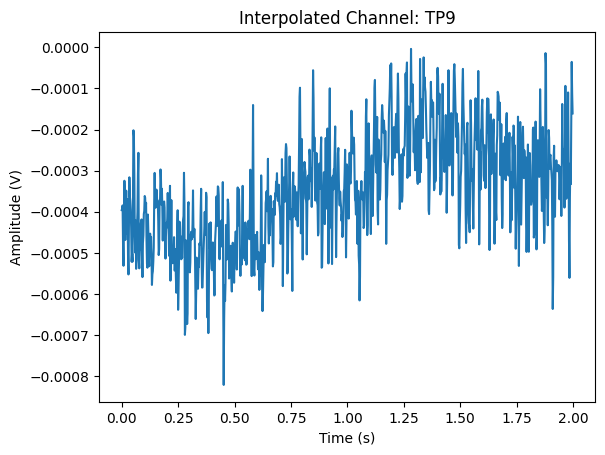

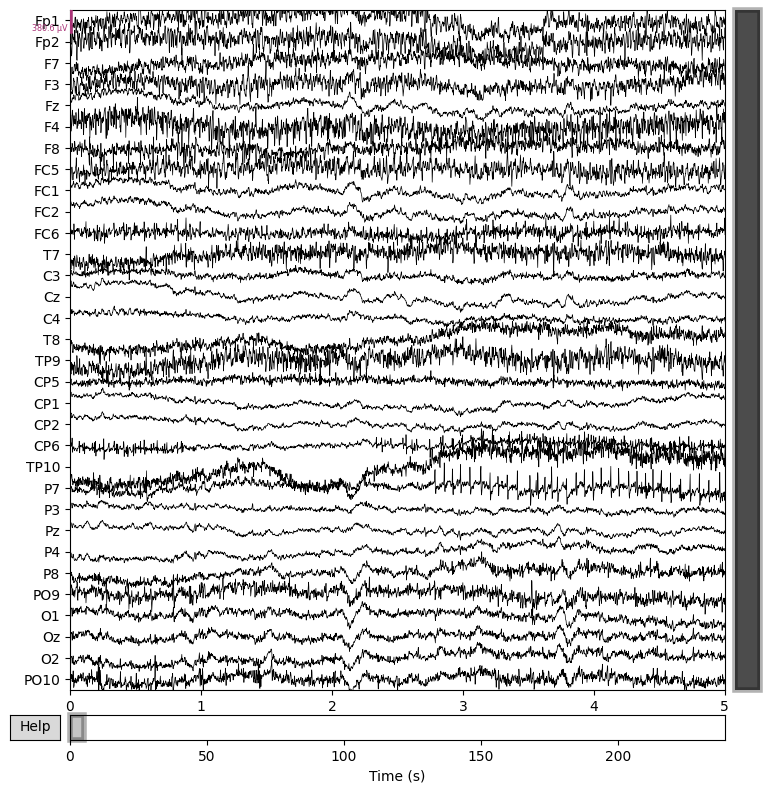

In [15]:
# Plot interpolated channel (e.g., TP9 or T8)
channel = 'TP9'
data = raw.get_data(picks=channel)[0]

plt.plot(raw.times[:1000], data[:1000])
plt.title(f"Interpolated Channel: {channel}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.show()
raw.plot(duration=5, n_channels=len(raw.ch_names), scalings='auto', show=False)
plt.show()

In [16]:
print(raw.info['custom_ref_applied'])  # Should be True

1 (FIFFV_MNE_CUSTOM_REF_ON)


### events


In [17]:
events_name = event.columns[1:]
events_name = events_name.to_list()
event_ids = {name: i+1 for i, name in enumerate(events_name)}
print(events_name)
print(event_ids)

['HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff', 'Replace', 'BothReleased']
{'HandStart': 1, 'FirstDigitTouch': 2, 'BothStartLoadPhase': 3, 'LiftOff': 4, 'Replace': 5, 'BothReleased': 6}


In [18]:
all_events = []
for i, name in enumerate(events_name):
  event_signal = event[name].to_numpy()
  onset_indices = np.where(np.diff(event_signal, prepend=0) == 1)[0]
  print(onset_indices)
  events = np.column_stack((onset_indices, np.zeros_like(onset_indices), event_ids[name] * np.ones_like(onset_indices)))
  all_events.append(events)
  print(events)
print(all_events)
print("==========="*14)
all_events = np.vstack(all_events)
print(all_events)
print("==========="*14)
all_events = all_events[np.argsort(all_events[:, 0])]
print(all_events)
print("Events shape:", all_events.shape)
print("First few events:\n", all_events[:5])
print("Event IDs:", event_ids)

[  1068   4708   7947  10905  13872  17175  20532  24674  28357  31449
  35167  38421  42051  45032  48308  52583  56569  60082  63540  67062
  70469  74580  77806  81059  84659  87704  91490  95496  99321 102770
 105885 109314 112351 116177]
[[  1068      0      1]
 [  4708      0      1]
 [  7947      0      1]
 [ 10905      0      1]
 [ 13872      0      1]
 [ 17175      0      1]
 [ 20532      0      1]
 [ 24674      0      1]
 [ 28357      0      1]
 [ 31449      0      1]
 [ 35167      0      1]
 [ 38421      0      1]
 [ 42051      0      1]
 [ 45032      0      1]
 [ 48308      0      1]
 [ 52583      0      1]
 [ 56569      0      1]
 [ 60082      0      1]
 [ 63540      0      1]
 [ 67062      0      1]
 [ 70469      0      1]
 [ 74580      0      1]
 [ 77806      0      1]
 [ 81059      0      1]
 [ 84659      0      1]
 [ 87704      0      1]
 [ 91490      0      1]
 [ 95496      0      1]
 [ 99321      0      1]
 [102770      0      1]
 [105885      0      1]
 [109314     

Not setting metadata
204 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 204 events and 501 original time points ...
0 bad epochs dropped
HandStart


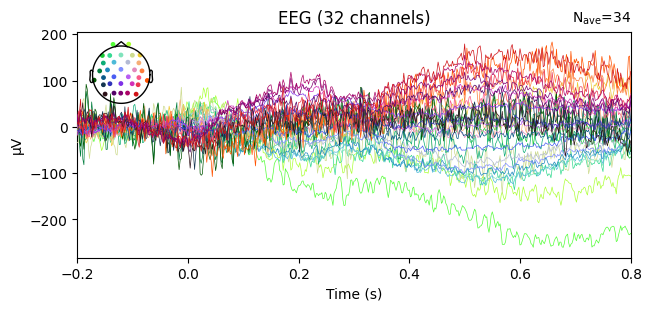

Figure(640x300)
FirstDigitTouch


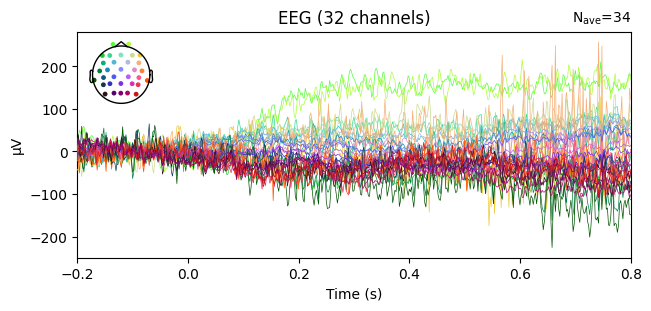

Figure(640x300)
BothStartLoadPhase


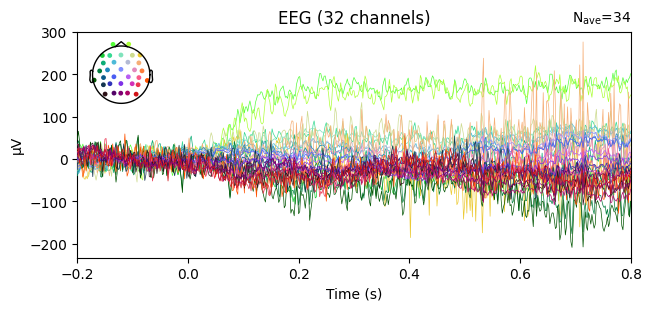

Figure(640x300)
LiftOff


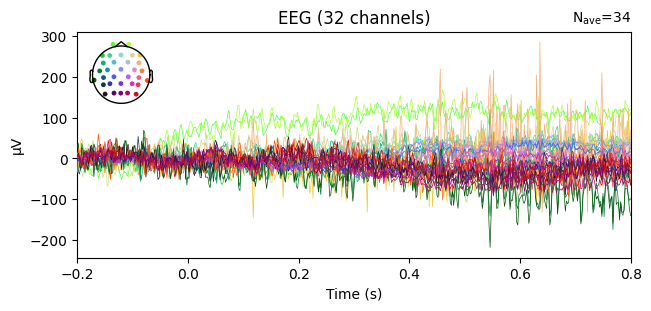

Figure(640x300)
Replace


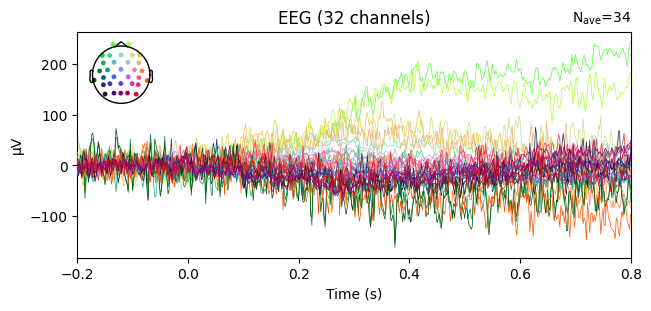

Figure(640x300)
BothReleased


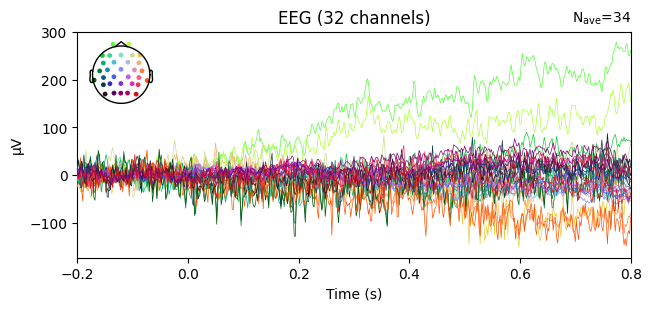

Figure(640x300)


In [19]:
epochs = mne.Epochs(raw, all_events, event_id=event_ids, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
for name in events_name:
  print(name)
  print(epochs[name].average().plot())

In [20]:
# for name in events_name:
#   print(name)
#   print(epochs[name].compute_psd(average=True))
#   evoked1 = epochs[name].average()
#   mne.viz.plot_compare_evokeds({'HandStart': evoked1, 'LiftOff': evoked2})


combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


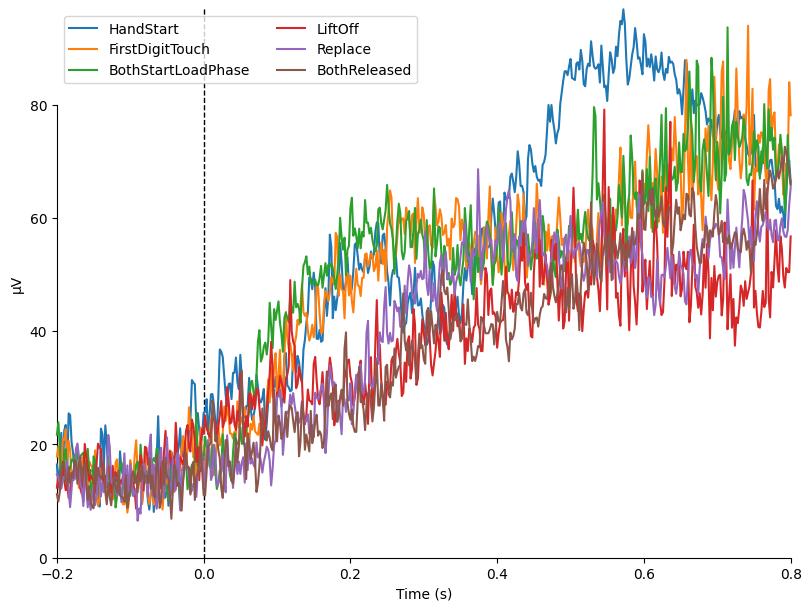

[<Figure size 800x600 with 1 Axes>]

In [21]:
evoked_arr = [epochs[event_name].average() for event_name in event_ids.keys()]

plot_dict = {event_name: evoked for event_name, evoked in zip(event_ids.keys(), evoked_arr)}

mne.viz.plot_compare_evokeds(plot_dict)


[[ 1.29262974e-05  2.48222916e-05  4.85083821e-06 ... -2.31978015e-04
  -2.33315699e-04 -2.30217660e-04]
 [-1.27530853e-05 -8.82767925e-06  1.87733792e-06 ... -1.04157397e-04
  -1.05318611e-04 -1.06338219e-04]
 [-8.51575270e-06  4.67435919e-06 -2.70885894e-06 ... -6.43906531e-05
  -6.77577495e-05 -6.50714749e-05]
 ...
 [ 2.61991570e-05  3.00691598e-06  2.15648743e-05 ...  3.93830802e-05
   4.54865720e-05  6.50551996e-05]
 [ 2.56781902e-05  1.32506551e-05  2.78968487e-05 ...  5.62150546e-05
   6.04067816e-05  6.75342328e-05]
 [ 9.20905801e-06  5.16387579e-06  3.39571282e-05 ...  1.04569452e-04
   1.02378826e-04  1.19535689e-04]]


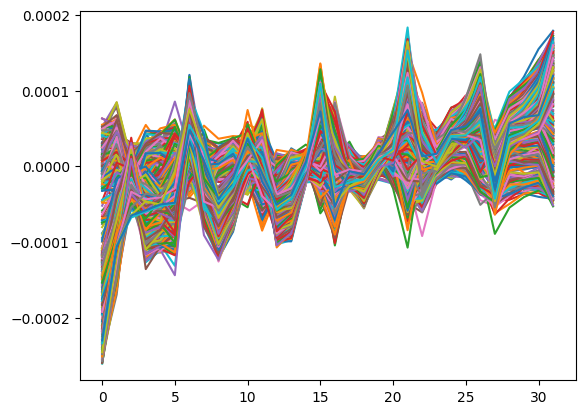

In [22]:
print(evoked_arr[0].data)
fig, ax = plt.subplots(1, 1)
ax.plot(evoked_arr[0].data)
plt.show()
evoked = evoked_arr[0]

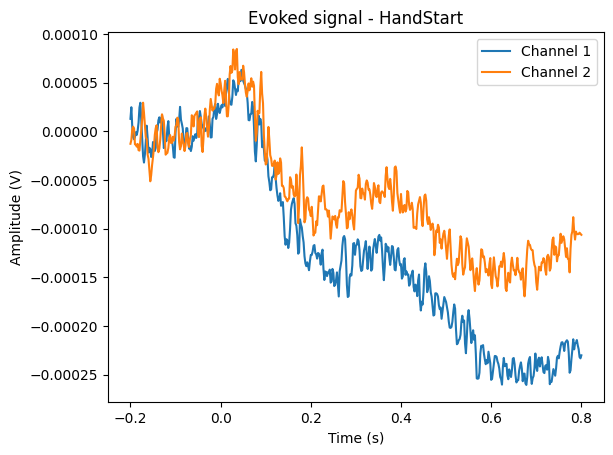

In [23]:
plt.plot(evoked_arr[0].times, evoked_arr[0].data[0], label='Channel 1')
plt.plot(evoked_arr[0].times, evoked_arr[0].data[1], label='Channel 2')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.title("Evoked signal - HandStart")
plt.legend()
plt.show()


In [24]:
print("Shape:", evoked.data.shape)
print("First channel signal:", evoked.data[0])  # prints signal from first electrode
print("First 10 values:", evoked.data[0][:10])  # just first 10 values to keep it readable


Shape: (32, 501)
First channel signal: [ 1.29262974e-05  2.48222916e-05  4.85083821e-06 -5.83280076e-06
 -8.15282513e-06 -5.72016827e-06 -8.14340063e-07 -3.60958121e-06
  7.98353558e-07  9.16746063e-06  2.46118319e-05  2.94116054e-05
  1.04785984e-05 -9.69574771e-06 -2.54706374e-05 -3.20378681e-05
 -2.37567377e-05 -1.09027069e-05  5.82488748e-06 -6.08663861e-06
 -2.17196211e-05 -1.68810763e-05 -1.80815287e-05 -2.63484888e-05
 -2.43903733e-05 -1.09973807e-05 -1.14135246e-05 -2.02016465e-05
 -1.66712425e-05 -1.55797739e-06  1.57080562e-06  1.13648364e-05
  1.44404510e-05  8.93439219e-06  1.05064576e-05  1.68641183e-05
 -3.92416090e-07 -1.71889985e-05 -1.41805608e-05 -8.56913373e-06
 -9.80961515e-06  4.00741054e-06  1.05415015e-05 -5.28183669e-06
 -7.57605372e-06 -8.77232580e-06 -8.90087949e-06 -1.54484042e-05
 -2.66377832e-05 -2.70984765e-05 -1.22055455e-06  1.28900587e-05
  6.99239290e-06  4.44603216e-06  1.20527343e-05  2.51907717e-05
  1.20275928e-05  7.85841069e-06  2.94460792e-06 -1

### Filtering

Comparison between before and after filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


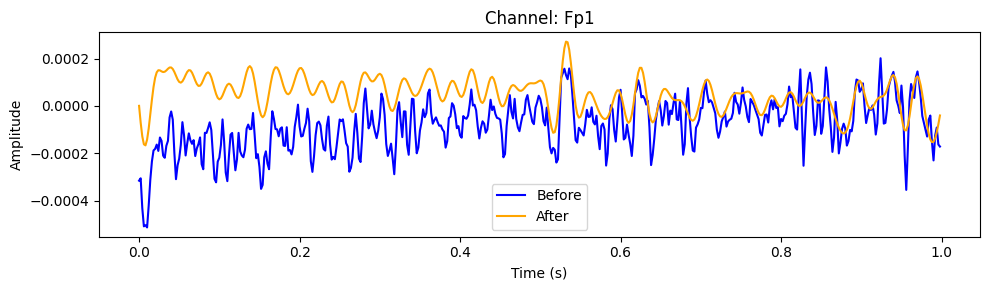

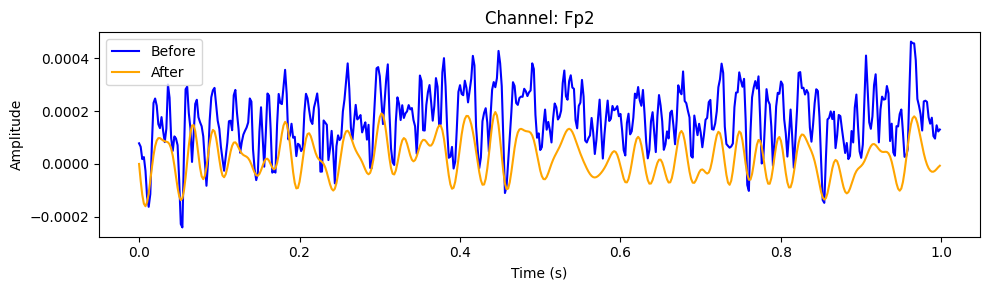

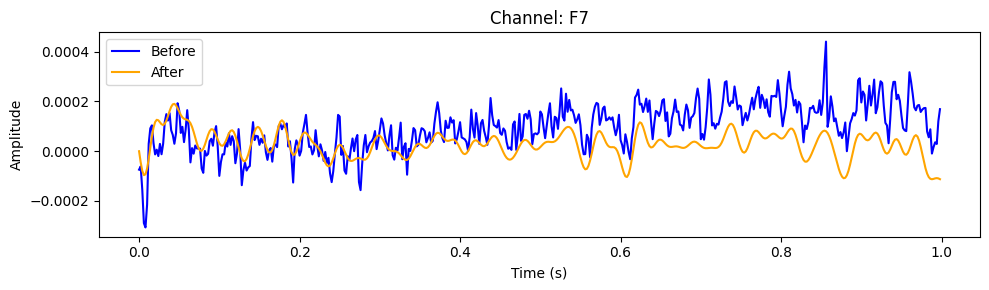

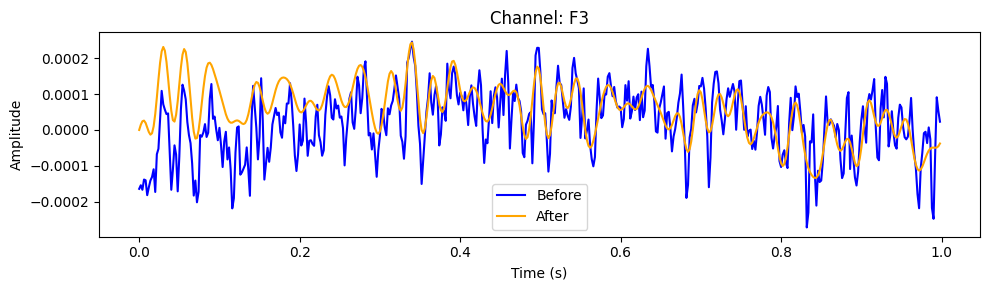

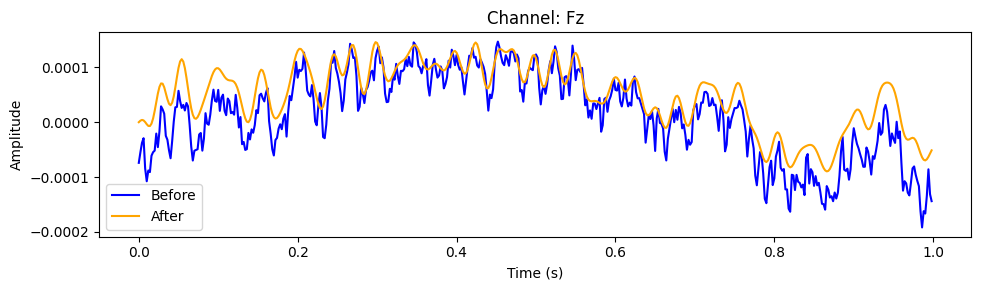

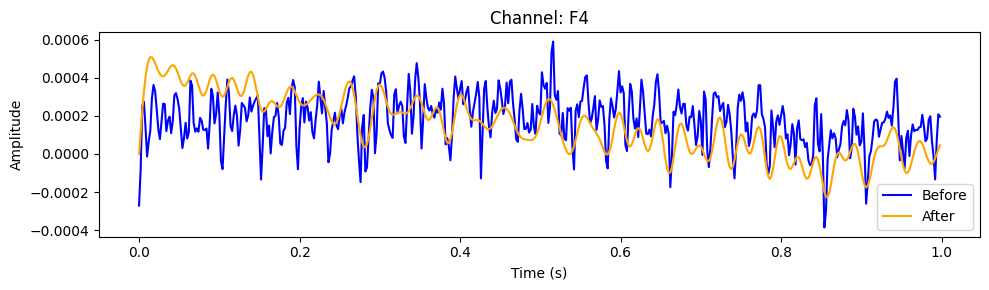

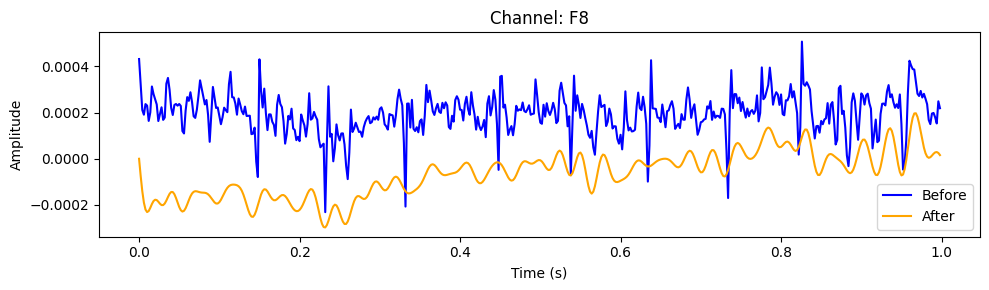

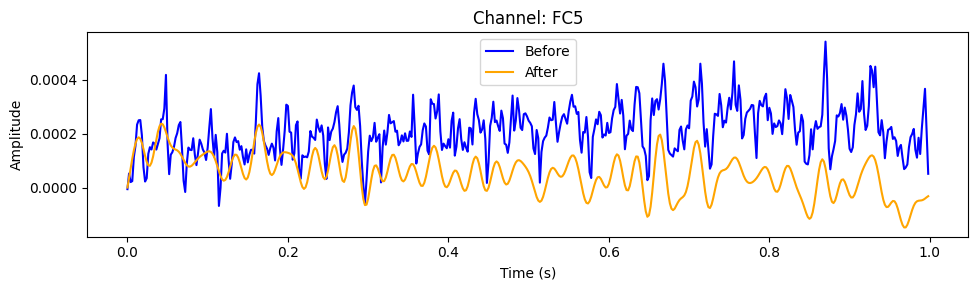

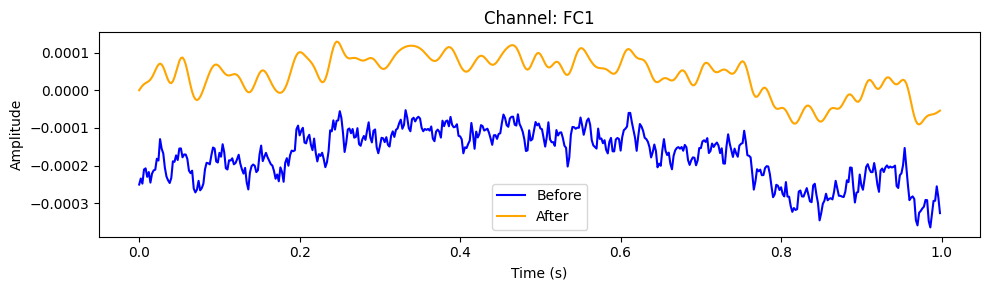

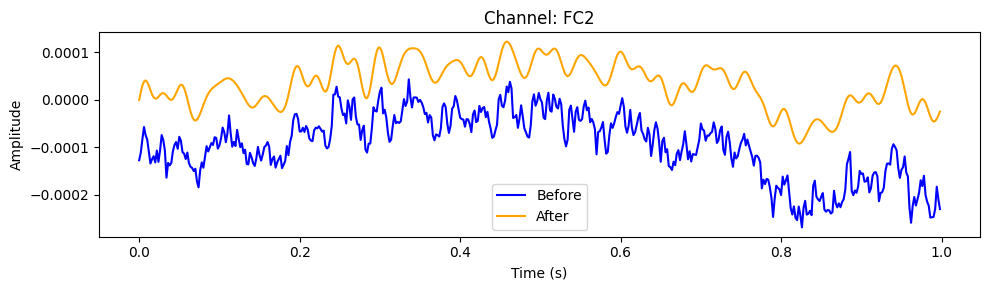

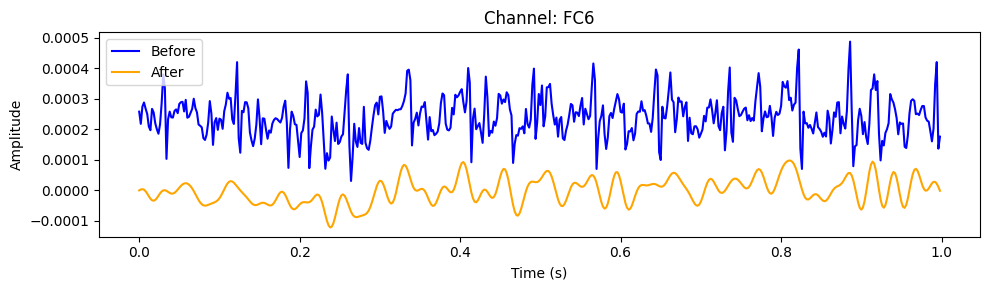

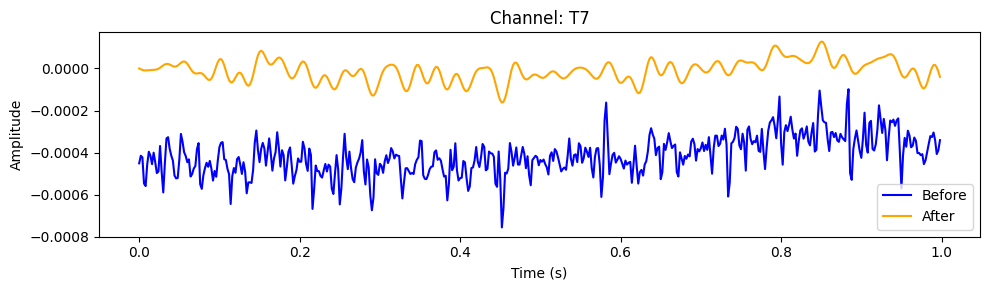

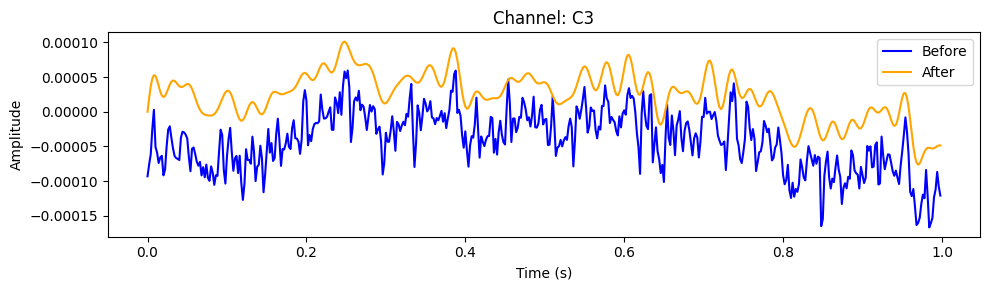

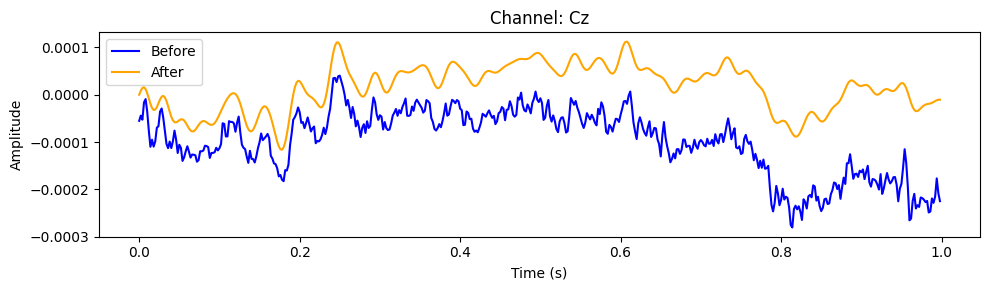

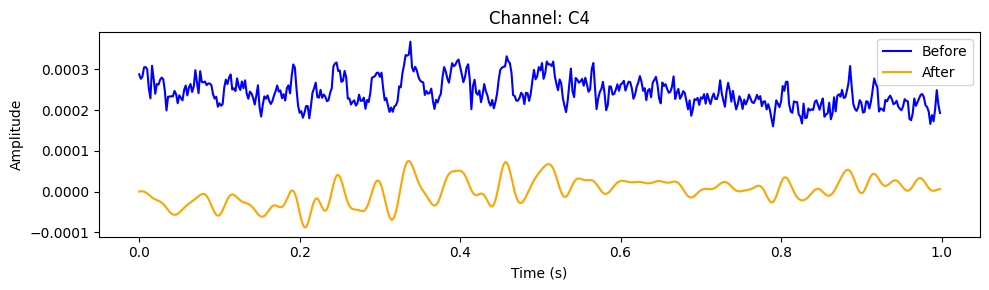

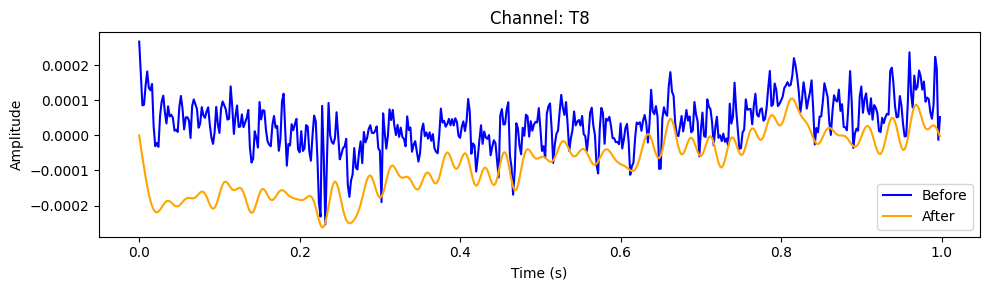

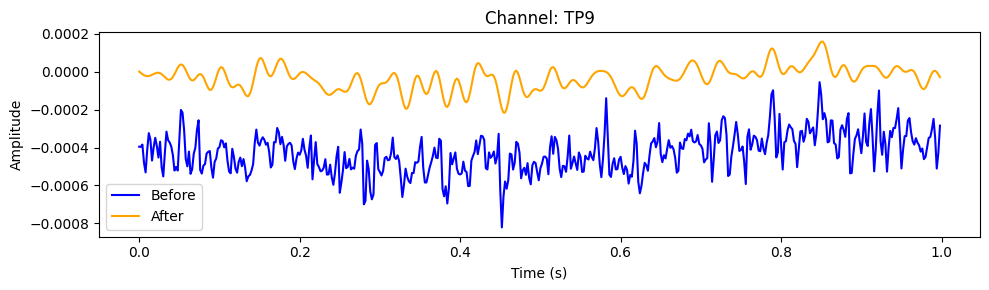

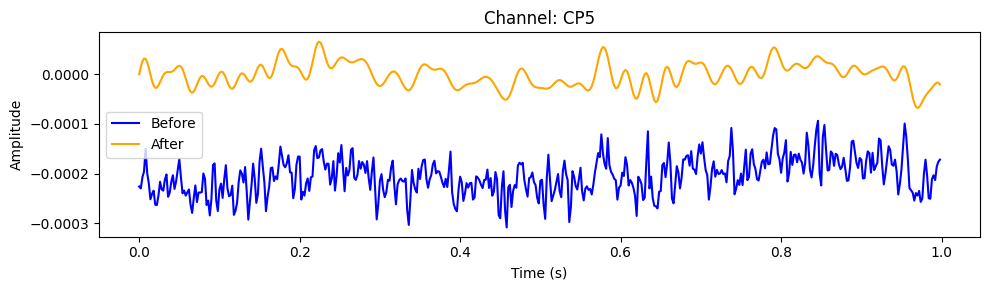

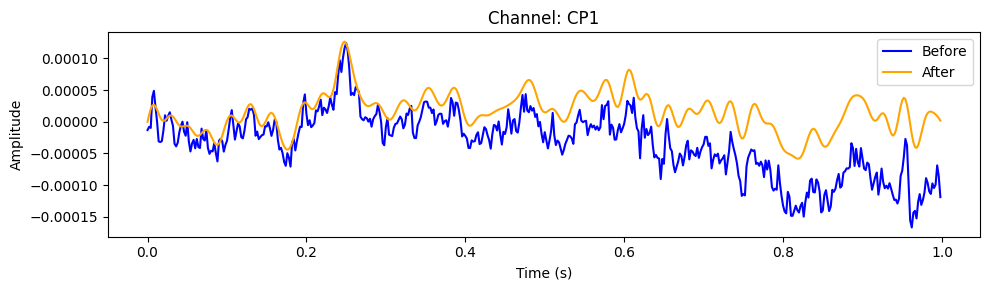

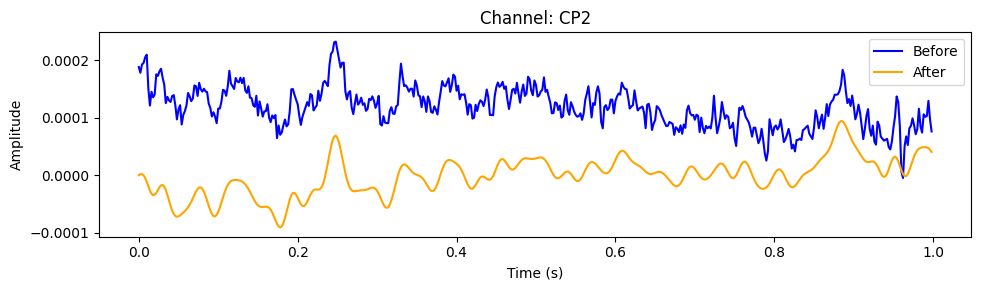

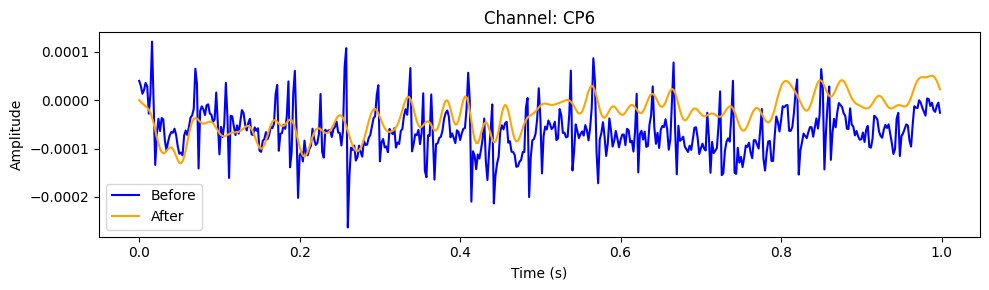

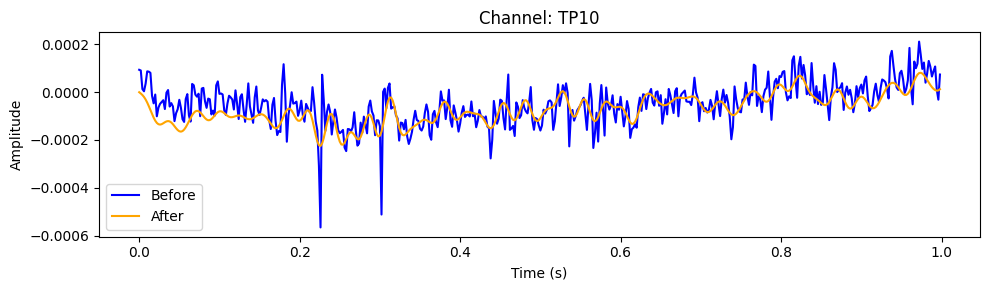

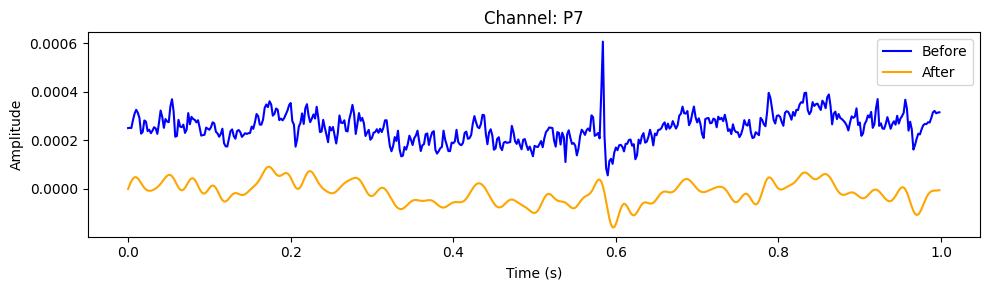

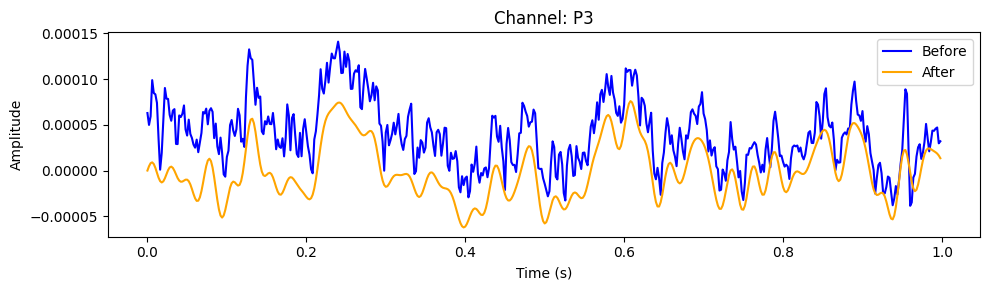

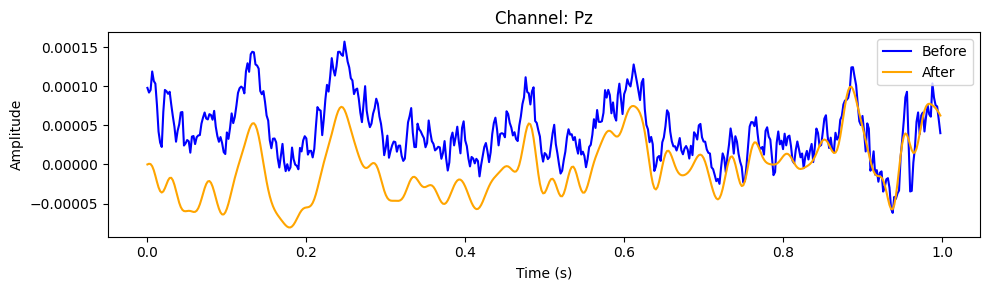

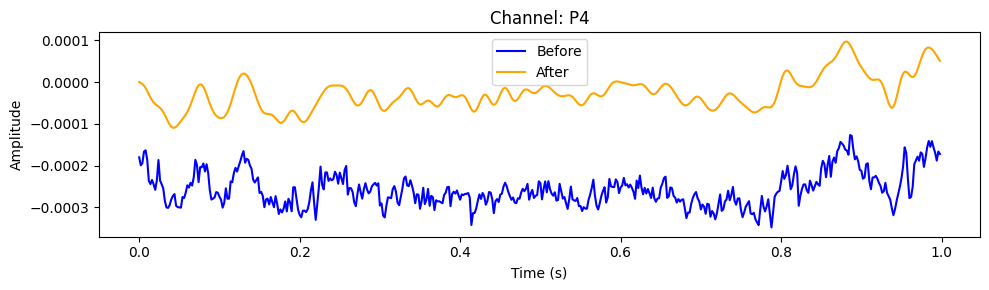

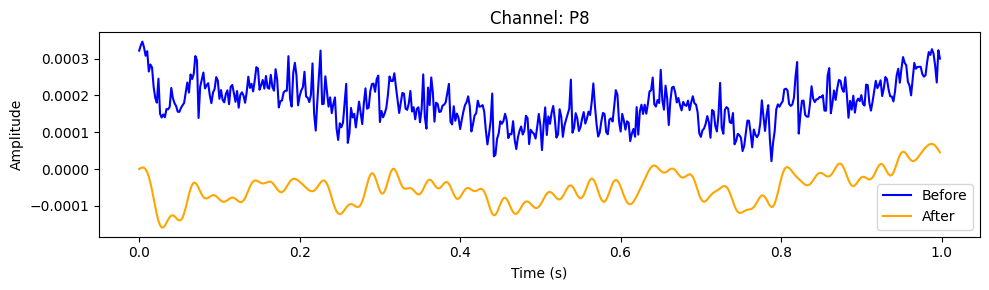

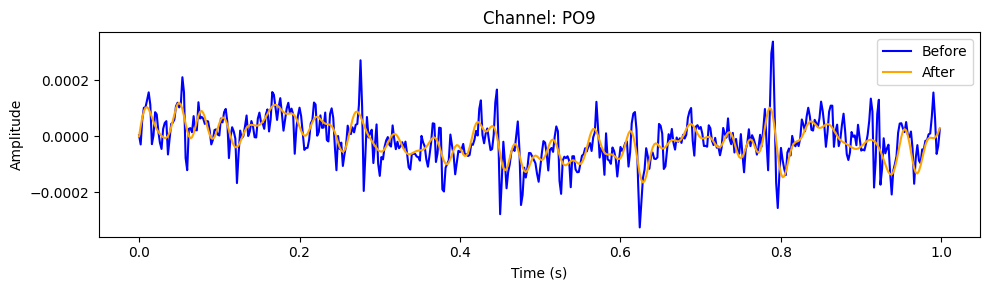

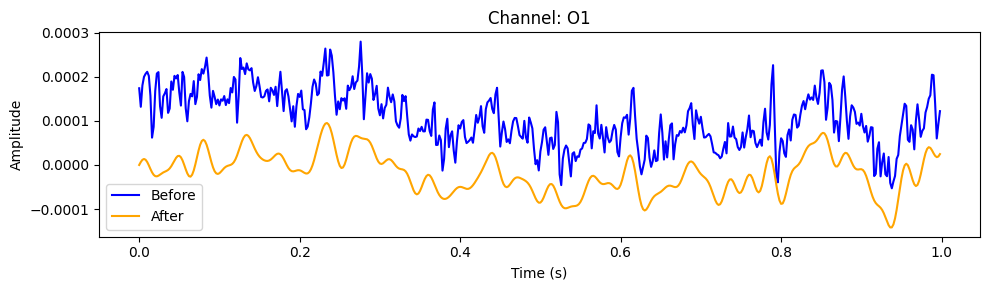

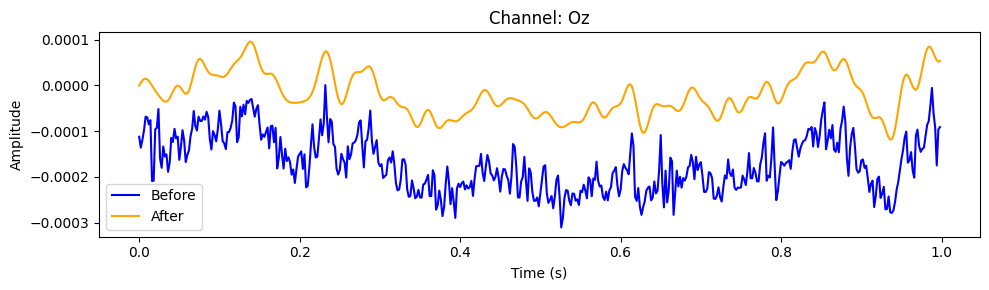

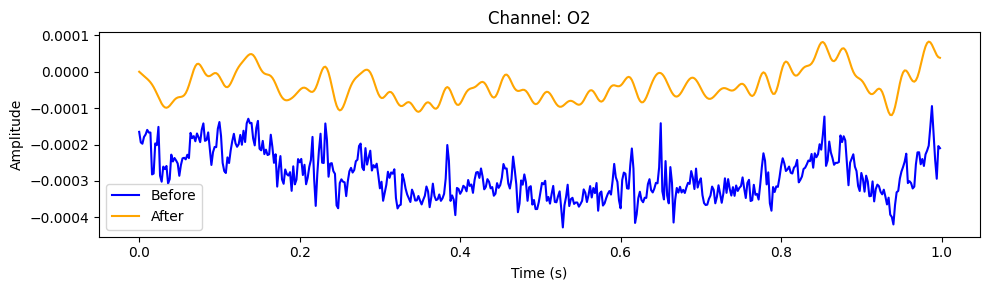

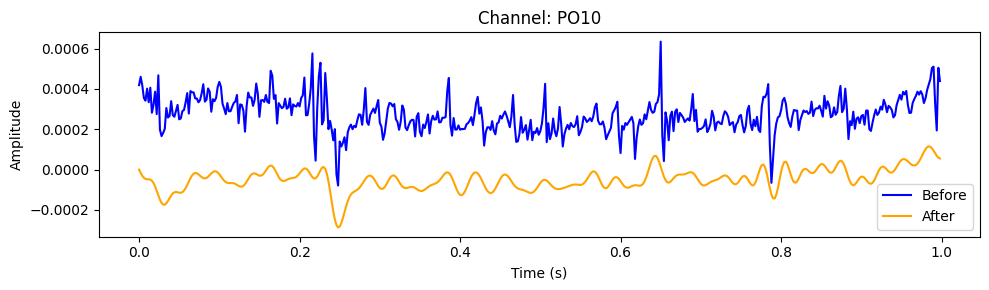

In [25]:
# Step 1: Backup original raw data
raw_before_filter = raw.copy()

# Step 2: Apply bandpass filter (1–40 Hz)
raw.filter(l_freq=1.0, h_freq=40.0)

# Step 3: Loop through all channels and plot before & after
n_channels = len(raw.ch_names)
time_range = 500  # number of time points to visualize (adjust as needed)

for i, ch in enumerate(raw.ch_names):
    data_before = raw_before_filter.get_data(picks=ch)[0, :time_range]
    data_after = raw.get_data(picks=ch)[0, :time_range]
    times = raw.times[:time_range]

    plt.figure(figsize=(10, 3))
    plt.plot(times, data_before, label='Before', color='blue')
    plt.plot(times, data_after, label='After', color='orange')
    plt.title(f'Channel: {ch}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.tight_layout()
    plt.show()


if there are genuine high-frequency signals of interest, an overly aggressive filter might attenuate them. This is why the filter settings (i.e., cutoff frequencies) must be chosen carefully based on your experiment and hypotheses.

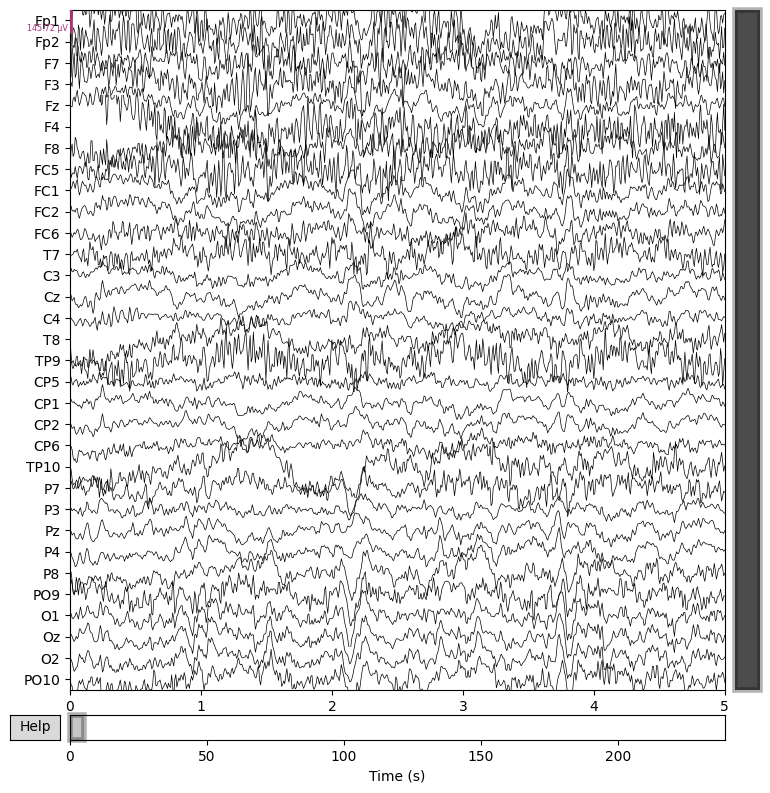

In [26]:
raw.plot(duration=5, n_channels=len(raw.ch_names), scalings='auto', show=False)
plt.show()